## Describe
#### Abstract: 
Relative CPU Performance Data, described in terms of its cycle time, memory size, etc.

#### Attribute Information:

1. vendor name: 30 
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
sratus, wang) 
2. Model Name: many unique symbols 
3. MYCT: machine cycle time in nanoseconds 
4. MMIN: minimum main memory in kilobytes
5. MMAX: maximum main memory in kilobytes
6. CACH: cache memory in kilobytes 
7. CHMIN: minimum channels in units 
8. CHMAX: maximum channels in units 
9. PRP: published relative performance 
10. ERP: estimated relative performance from the original article

## Data preprocessing

In [1]:
#import the librarys :
import numpy as np # numérical calculation
import pandas as pd # dataset and array management
import matplotlib.pyplot as plt # 2D plotting
import seaborn as sns # attractive statistical graphics and visualization

In [2]:
# dataset import :
dataset = pd.read_excel('data_perform.xlsx')

In [3]:
# dataset ispection :
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor        209 non-null object
Model Name    209 non-null object
MYCT          209 non-null int64
MMIN          209 non-null int64
MMAX          209 non-null int64
CACH          209 non-null int64
CHMIN         209 non-null int64
CHMAX         209 non-null int64
PRP           209 non-null int64
ERP           209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [4]:
# the first lignes
dataset.head()

,vendor,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


After check we dont have any null values.
We have 10 parametres, 8 quanti and 2 quali (categorical).

Now we mouve in next step for data mining and describe our dataset correlation and some basics statisticals.

## Data Mining

In [5]:
dataset.describe() # discribe the quanti variables

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


### 1-univariate analysis

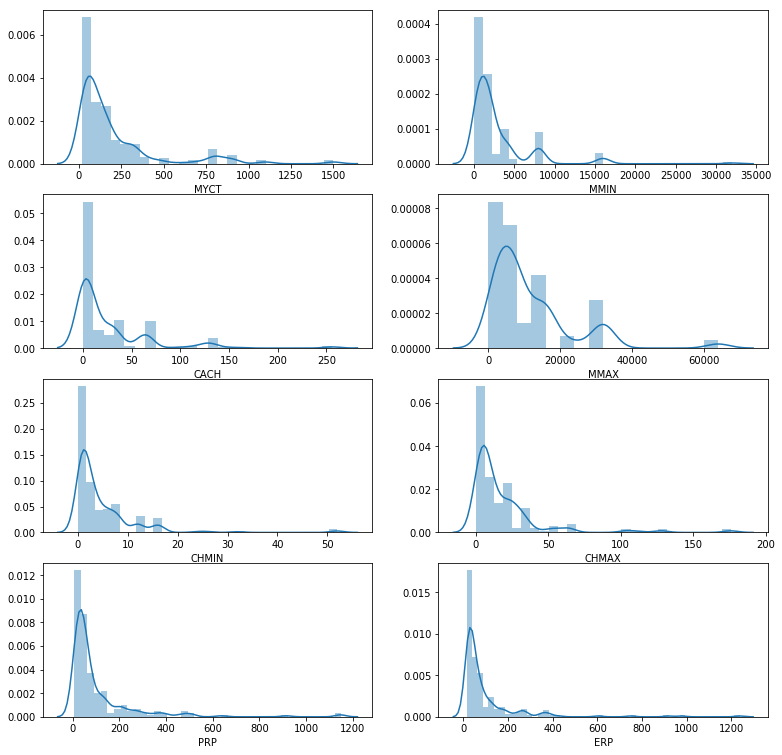

In [6]:
# The distributions of  quantitatives variables
fig, ax = plt.subplots(figsize = (13,13), ncols=2, nrows=4) 
sns.distplot(dataset['MYCT'], ax = ax[0,0])  
sns.distplot(dataset['MMIN'], ax = ax[0,1]) 
sns.distplot(dataset['MMAX'], ax = ax[1,1]) 
sns.distplot(dataset['CACH'], ax = ax[1,0])
sns.distplot(dataset['CHMIN'], ax = ax[2,0])
sns.distplot(dataset['CHMAX'], ax = ax[2,1])
sns.distplot(dataset['PRP'], ax = ax[3,0])
sns.distplot(dataset['ERP'], ax = ax[3,1])
plt.show()

No distribution is normal.
moreover, we can see the same distribution between PRP (published relative performance) and ERP (estimated relative performance of the original article)

### 2- Bivariate analysis

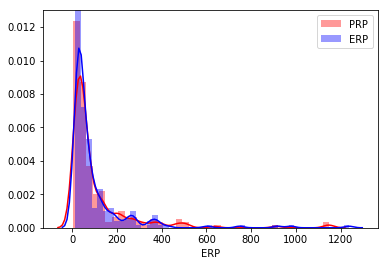

In [7]:
# Now we explore bivariate analysis beetwen PRP and ERP to confirme our intuition for correlation : 
sns.distplot(dataset['PRP'], color = 'red')
sns.distplot(dataset['ERP'], color = 'blue')
plt.legend(['PRP','ERP'])

In [8]:
corrPRP_ERP = np.corrcoef (dataset['PRP'], dataset['ERP'])

In [9]:
corrPRP_ERP

array([[1.        , 0.96647166],
       [0.96647166, 1.        ]])

These results show that the two variables are correlated.

### 3-Multivariate analysis

In [10]:
corr_matrice = dataset.corr()

In [11]:
corr_matrice

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


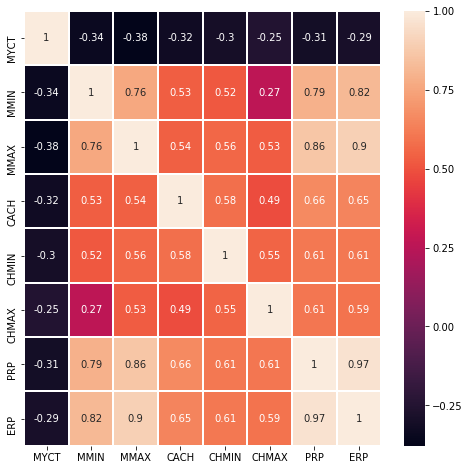

In [12]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(dataset.corr(), annot=True, linewidths= 1, fmt= '.2g',ax=ax)

##### Comment:
Les corrélations entre variables sont relativement faibles, sauf entre les variables ERP, PRP et les variables MMIN et MMAX

## Linear Regression

Before doing the LR machine learning, we need to define the X (matrix of independantes values), Y (matrix of dependdates values) and split our dataset in 2 parts : text set and training set

In [13]:
x = dataset.iloc[:, 2:9].values # this selection exclude the categorical values
y = dataset.iloc[:, -1].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.23, random_state = 0)

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True, normalize=True)
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [16]:
y_pred = regressor.predict(x_test)

In [17]:
regressor.predict(np.array([[125, 256, 6000, 256, 16, 128, 198]]))

array([158.66360314])

In [18]:
regressor.score(x_train, y_train)

0.9657751367839628